In [13]:
# create feature pickles to use around the place
# humpback whale pickle with new annots
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)


['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/final/tests/get_features', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm', '/Users/david/Documents/mastersCode/ubm']


In [14]:
import utils
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import librosa

def get_feature(samp, nfft):
    # add optionals here if needed
    # mfcc
    # feat = librosa.feature.mfcc(y=samp,sr=4000, n_mfcc=20, n_fft=nfft).T
    feat = useful.get_log_power_feature(samp, nfft=nfft)
    return feat

In [16]:
from whale.setup import get_data, constants, annotations
from whale.setup.constants_01 import *
import importlib
importlib.reload(constants)

importlib.reload(get_data)
from final import useful
importlib.reload(useful)

# constants for fe and what not
fs = 4000

labels_set = [HUMPBACK, SOUTHERN_RIGHT_WHALE, BRYDES, BOWHEAD, SPERM, NOISE] #, HUMPBACK_B, BOWHEAD, NOISE]
num_to_label = {i: labels_set[i] for i in range(len(labels_set))}
label_to_num = {labels_set[i] : i for i in range(len(labels_set))}

get_data_dict = {
    HUMPBACK: [get_data.GetDataSimple(HPB_WTK_DATA,HPB_WTK_LABEL_ALL, fs, useful.file_to_audio)],
    SOUTHERN_RIGHT_WHALE: [get_data.GetDataSimple(SRW_WTK_DATA,SRW_WTK_LABEL, fs, useful.file_to_audio)],
    BRYDES: [get_data.GetDataSimple(BRD_VRS_DATA,BRD_VRS_LABEL, fs, useful.file_to_audio)],
    BOWHEAD: [get_data.GetDataSimple(BWH_MBY_DATA,BWH_MBY_LABEL, fs, useful.file_to_audio),
              get_data.GetDataSimple(BWH_YTD_DATA,BWH_YTD_LABEL, fs, useful.file_to_audio),],
    SPERM: [get_data.GetDataSimple(SPM_WTK_DATA_0,SPM_WTK_LABEL_0, fs, useful.file_to_audio),
            get_data.GetDataSimple(SPM_WTK_DATA_1,SPM_WTK_LABEL_1, fs, useful.file_to_audio),
            get_data.GetDataSimple(SPM_WTK_DATA_2,SPM_WTK_LABEL_2, fs, useful.file_to_audio)],
    NOISE: [get_data.GetDataSimple(BRD_VRS_DATA,BRD_VRS_NOISE, fs, useful.file_to_audio),
            get_data.GetDataSimple(HPB_MBY_DATA,HPB_MBY_NOISE, fs, useful.file_to_audio)]
}

In [17]:
samples, labels = useful.get_samples(get_data_dict, labels_set, label_to_num)

__collected samples__
HPB :  76
SRW :  63
BRD :  40
BWH :  72
SPM :  33
NOISE :  46


In [156]:
from python_speech_features.base import mfcc


In [ ]:
# plot one of each
# for label in labels_set:
#     print(label_to_num[label])
#     # get feature
#     locs = np.where([i==label_to_num[label] for i in labels])[0]
#     feature = all_features[locs[0]]
#     print(label)
#     useful.vis_helper(feature)
#     print('\n')

In [160]:
def normalize_features(feats):
    all_features_concat = np.concatenate(feats)
    mean = np.mean(all_features_concat, axis=0)
    std_dev = np.std(all_features_concat, axis=0)

    return [((feat - mean) / std_dev) for feat in feats]

def average_features(some_feature, avg_over, d):
    new_n = len(some_feature) // avg_over
    avg_features = np.empty((new_n, d))

    for i in range(new_n):
        start_idx = i * avg_over
        end_idx = (i + 1) * avg_over
        avg_features[i, :] = np.mean(some_feature[start_idx:end_idx, :], axis=0)
    return avg_features

In [205]:
from scipy.interpolate import interp1d

all_features = []
nfft = 128 # 256 # 256 #128 # 256 #128
average_over = 3
to_remove = []

for i in range(len(samples)):
    sample = samples[i]
    # feat = mfcc(sample, nfft=nfft,samplerate=4000, numcep=13)
    # feat_a = librosa.feature.mfcc(y=sample,sr=4000, n_mfcc=13, n_fft=nfft).T
    feat_b = get_feature(sample, nfft)[2:,:]
    # try:
    #     interp_func = interp1d(np.linspace(0, 1, len(feat_a)), feat_a, axis=0, kind='linear')
    # except Exception as e:
    #     # Handle any other unexpected exceptions
    #     print("An unexpected error occurred:", e)
    #     to_remove.append(i)
    #     all_features.append([-1])
    #     continue
    # new_indices = np.linspace(0, 1, len(feat_b))
    # interpolated_mfcc_features = interp_func(new_indices)
    # combined_features = np.concatenate((feat_b, interpolated_mfcc_features), axis=1)
    all_features.append(feat_b) #152 129

if len(to_remove) > 0:
    all_features = [value for index, value in enumerate(all_features) if index not in to_remove]
    samples = [value for index, value in enumerate(samples) if index not in to_remove]
    labels = [value for index, value in enumerate(labels) if index not in to_remove]

In [206]:
normalized_features = normalize_features(all_features)
averaged_features = [average_features(feat, 3, feat.shape[1]) for feat in normalized_features]

0
HPB


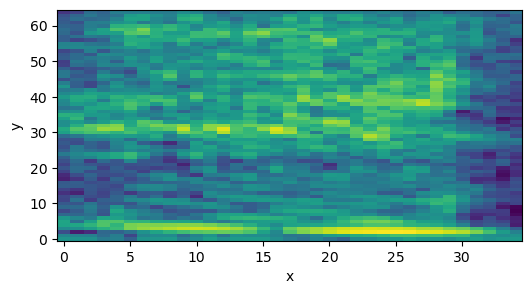



1
SRW


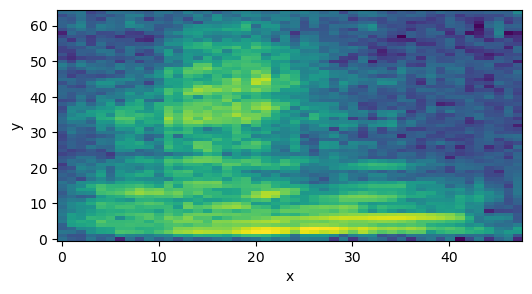



2
BRD


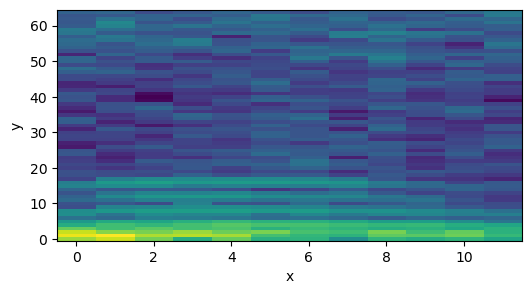



3
BWH


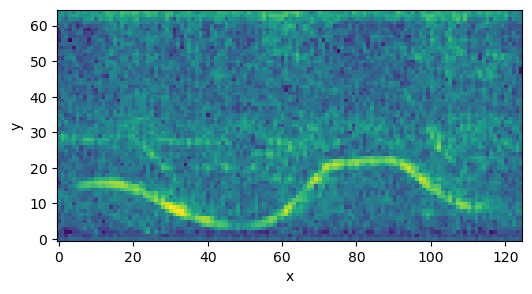



4
SPM


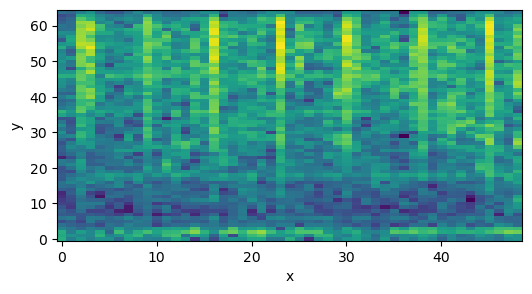



5
NOISE


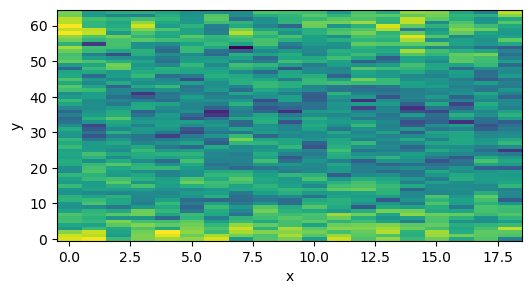

In [208]:
# plot one of each
for label in labels_set:
    print(label_to_num[label])
    # get feature
    locs = np.where([i==label_to_num[label] for i in labels])[0]
    feature = averaged_features[locs[0]]
    print(label)
    useful.vis_helper(feature)
    print('\n')

fitting  HPB
fitting  SRW
fitting  BRD
fitting  BWH
fitting  SPM
fitting  NOISE
fitting  HPB
fitting  SRW
fitting  BRD
fitting  BWH
fitting  SPM
fitting  NOISE
fitting  HPB
fitting  SRW
fitting  BRD
fitting  BWH
fitting  SPM
fitting  NOISE
fitting  HPB
fitting  SRW
fitting  BRD
fitting  BWH
fitting  SPM
fitting  NOISE


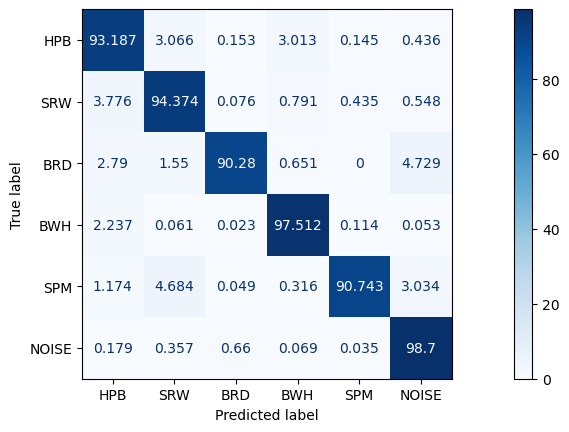

In [214]:

# separate using cross-validation
import final.cross_validation as cv
from final.cross_validation import *
import importlib
importlib.reload(cv)
from hmmlearn.hmm import GaussianHMM
n_states = 10
n_folds = 2
inits = 2
cv_output = cv.split_data_for_cross_validation(averaged_features, labels, n_folds, test_ratio=0.2)
# simple testing
cms = []
for i in range(n_folds):
    cv_index = i
    train = useful.SampleHolder(cv_output[TRAIN_DATA][cv_index], cv_output[TRAIN_LABEL][cv_index])
    val = useful.SampleHolder(cv_output[VAL_DATA][cv_index], cv_output[VAL_LABEL][cv_index])
    for init in range(inits):
        hmms = {lab: GaussianHMM(n_states, covariance_type='diag') for lab in labels_set}
        for lab in hmms:
            print('fitting ', lab)
            cur_hmm = hmms[lab]
            feat_indicis = train.sample_labels == label_to_num[lab]
            hmm_features = [item for item, condition in zip(train.samples, feat_indicis) if condition]
            cur_hmm.fit(np.concatenate(hmm_features))
        from final.tests import decode_combine as dc
        importlib.reload(dc)
        combined_model = dc.DecodeCombineGaussian([hmm for hmm in hmms.values()])
        val.features = val.samples
        val.update_feature_labels()
        _, val_pred, val_log_prob = combined_model.decode_hmmlearn(np.concatenate(val.features))
        accuracy = useful.perf_measure(np.concatenate(val.feature_labels), val_pred)
        from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
        cm = confusion_matrix(np.concatenate(val.feature_labels), val_pred, labels=[0,1,2,3,4,5], normalize='true')
        cms.append(cm)

avg_cm = useful.get_average_cm(cms)
avg_cm = np.round(avg_cm * 100000) / 1000
disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm,display_labels=labels_set)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [134]:
# import pickle
# # Pickle for reading in Python
# output = open('cv_output_log_power_avg' + ".pkl", "wb")
# pickle.dump(cv_output, output)
# output.close()

In [135]:
# simple testing
cv_index = 0
train = useful.SampleHolder(cv_output[TRAIN_DATA][cv_index], cv_output[TRAIN_LABEL][cv_index])
val = useful.SampleHolder(cv_output[VAL_DATA][cv_index], cv_output[VAL_LABEL][cv_index])

In [136]:
# train hmms


fitting  HPB
fitting  SRW
fitting  BRD
fitting  BWH
fitting  SPM
fitting  NOISE


In [140]:
np.unique(val_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 760, 1037,  103, 2311,  615,  362]))

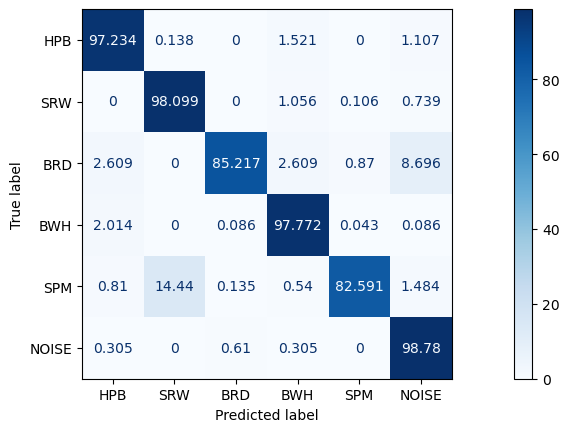

In [47]:
cv_index = 0
train = useful.SampleHolder(cv_output[TRAIN_DATA][cv_index], cv_output[TRAIN_LABEL][cv_index])
val = useful.SampleHolder(cv_output[VAL_DATA][cv_index], cv_output[VAL_LABEL][cv_index])

In [48]:
# train.features = []
# for sample in train.samples:
#     train.features.append(get_feature(sample, nfft))
#
# val.features = []
# for sample in val.samples:
#     val.features.append(get_feature(sample, nfft))
#
# features_0 = {
#     train: train,
#     val: val
# }

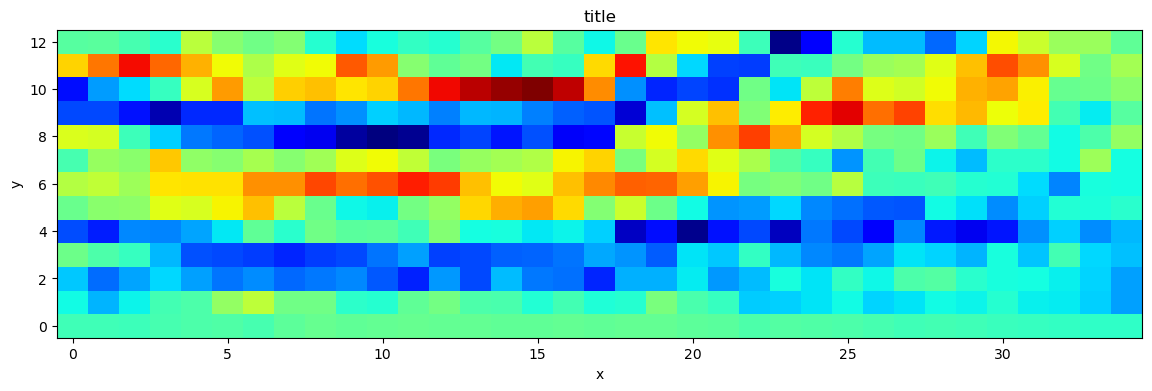

In [49]:
utils.plot_spectrogram(train.samples[4])

In [94]:
# train
features_concat = np.vstack(train.features)
features_len = [0]
n_doc = 0
rolling_total = 0

for i in range(len(train.features)):
    features_len.append(len(train.features[i]) + rolling_total)
    rolling_total += len(train.features[i])
    n_doc += 1

class MyGroupXData:
    def __init__(self, X, TrueParams, Xprev, column_names, dim, doc_range, nDoc, nDocTotal, true_state_names):
        self.X = X
        self.TrueParams = TrueParams
        self.Xprev = Xprev
        self.column_names = column_names
        self.dim = dim
        self.doc_range = doc_range
        self.nDoc = nDoc
        self.nDocTotal = nDocTotal
        self.true_state_names = true_state_names

bnpy_dataset = MyGroupXData(
    features_concat,
    {},
    features_concat, np.array([]), features_concat.shape[1],
    np.array(features_len), n_doc, n_doc, np.array([]))

bnpy_dataset.TrueParams['Z'] = np.zeros(bnpy_dataset.X.shape[0])
bnpy_dataset.TrueParams['K'] = 10

In [ ]:
import pickle
# Pickle for reading in Python
output = open('humpback_v1_bnpy_dataset' + ".pkl", "wb")
pickle.dump(bnpy_dataset, output)
output.close()


In [120]:
output = open('humpback_v1_bnpy_dataset_val' + ".pkl", "wb")
pickle.dump([train.features, val.features], output)
output.close()

In [95]:
# /Users/david/Documents/mastersCode/ubm/final/tests/get_features/humpback_v1.pkl


In [110]:
from hmmlearn.hmm import GaussianHMM

def normalize_matrix(matrix):
    matrix += 1e-40
    return matrix / np.sum(matrix, axis=(matrix.ndim - 1), keepdims=True)

def get_hmm_from_bnp(bnpy_params):
    # creat hmm
    hmm_bnpy = GaussianHMM(n_components=len(bnpy_params['pi']), covariance_type='diag', init_params='')
    hmm_bnpy.n_features = bnpy_params['means'].shape[1]
    hmm_bnpy.transmat_, hmm_bnpy.startprob_, hmm_bnpy.means_ = \
        normalize_matrix(bnpy_params['A']), normalize_matrix(bnpy_params['pi']), bnpy_params['means']
    hmm_bnpy.covars_ = bnpy_params['covars']
    return hmm_bnpy

def score_hmm(some_hmm: GaussianHMM, features_array):
    scores = []
    for i in range(len(features_array)):
        scores.append(some_hmm.score(features_array[i]) / len(features_array[i]))
    print(np.sum(scores))

In [113]:
# np.sum([len(feat) for feat in val.features])
# len(np.concatenate(val.features))
# hmm_bnpy.score(np.concatenate(val.features), [len(feat) for feat in val.features])
hmm_bnpy_params = pickle.load(open(r'humpback_v1_bnpy.pkl', 'rb'))
hmm_bnpy_inf = get_hmm_from_bnp(hmm_bnpy_params)
score_hmm(hmm_bnpy_inf, val.features)

-4121.527308537601


In [122]:
hmm_bnpy_params_fin = pickle.load(open(r'humpback_v1_bnpy_finite.pkl', 'rb'))
hmm_bnpy_fin = get_hmm_from_bnp(hmm_bnpy_params_fin)
score_hmm(hmm_bnpy_fin, val.features)

-4130.720037111644


In [116]:
hmm_bnpy_params_em = pickle.load(open(r'humpback_v1_bnpy_finite_em.pkl', 'rb'))
hmm_bnpy_em = get_hmm_from_bnp(hmm_bnpy_params_em)
score_hmm(hmm_bnpy_em, val.features)

-4011.275237299567


In [117]:
hmm_em = GaussianHMM(n_components=hmm_bnpy_em.n_components, covariance_type='diag')
hmm_em.fit(features_concat, [len(feat) for feat in train.features])
score_hmm(hmm_em, val.features)

-4045.4698365868853


-170109.73696452862